## Basic analysis of the extracted data for each parcel (plot) of the rice data (observed in field data vs observed satellite data)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

crop_data = pd.read_csv('../DataIn/Analisis_basico_crecimiento/crop_register.csv')

In [34]:
crop_data

,crop_register_id,location_id,site_id,farmer_id,type_variety_id,variety_id,fecha_medicion,dias_despues_siembra,n_plantas,peso_fresco,peso_fresco_planta,peso_seco,peso_seco_planta,long_raiz,altura_planta,leaf_area_index
0,1,1,1,1,1,1,2022-08-10,1,1.0,0.10,0.100000,0.10,0.100000,1.0,1.0,0.00
1,2,1,1,1,1,1,2022-09-28,48,5.0,9.36,1.872000,1.65,0.330000,17.0,49.0,0.14
2,3,1,1,1,1,1,2022-10-10,60,5.0,32.10,6.420000,3.97,0.794000,19.0,53.0,0.35
3,4,1,1,1,1,1,2022-10-19,69,5.0,70.19,14.038000,8.46,1.692000,30.0,66.0,0.71
4,5,1,1,1,1,1,2022-11-19,99,9.0,155.82,17.313333,37.18,4.131111,27.0,84.0,0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,65,5,1,3,2,2,2023-09-29,73,7.0,22.94,3.277143,2.93,0.418571,17.0,55.0,0.83
65,66,5,1,3,2,2,2023-10-14,88,5.0,52.10,10.420000,7.41,1.482000,29.0,70.0,1.26
66,67,5,1,3,2,2,2023-10-29,103,17.0,170.47,10.027647,33.85,1.991176,28.0,101.0,2.09
67,68,5,1,3,2,2,2023-11-16,120,6.0,144.00,24.000000,26.06,4.343333,30.0,144.0,2.16


<Figure size 1200x600 with 0 Axes>

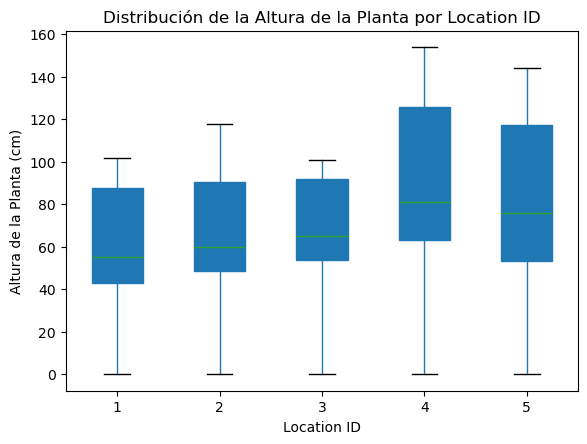

<Figure size 1200x600 with 0 Axes>

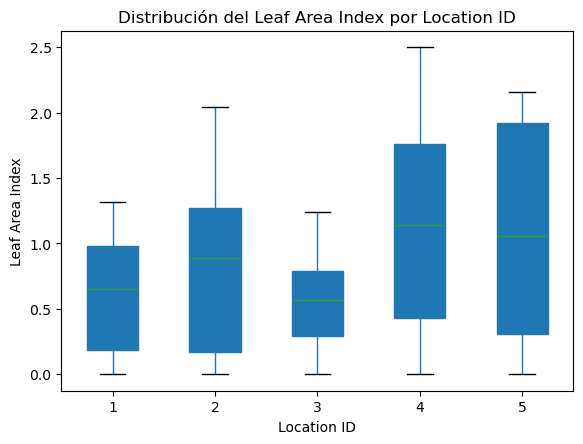

In [33]:


# Convertir la fecha de medición al formato de fecha
crop_data['fecha_medicion'] = pd.to_datetime(crop_data['fecha_medicion'])

# Filtrar las columnas relevantes
boxplot_data = crop_data[['location_id', 'altura_planta', 'leaf_area_index']]

# Crear boxplot para Altura de Planta
plt.figure(figsize=(12, 6))
boxplot_data.boxplot(column='altura_planta', by='location_id', grid=False, patch_artist=True)
plt.title('Distribución de la Altura de la Planta por Location ID')
plt.suptitle('')
plt.xlabel('Location ID')
plt.ylabel('Altura de la Planta (cm)')
plt.show()

# Crear boxplot para Leaf Area Index
plt.figure(figsize=(12, 6))
boxplot_data.boxplot(column='leaf_area_index', by='location_id', grid=False, patch_artist=True)
plt.title('Distribución del Leaf Area Index por Location ID')
plt.suptitle('')
plt.xlabel('Location ID')
plt.ylabel('Leaf Area Index')
plt.show()

### Crecimiento vs indices planet

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
planet_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Planet_data.xlsx', sheet_name = 'Sheet2')
crop_data = pd.read_csv('../DataIn/Analisis_basico_crecimiento/crop_register.csv')


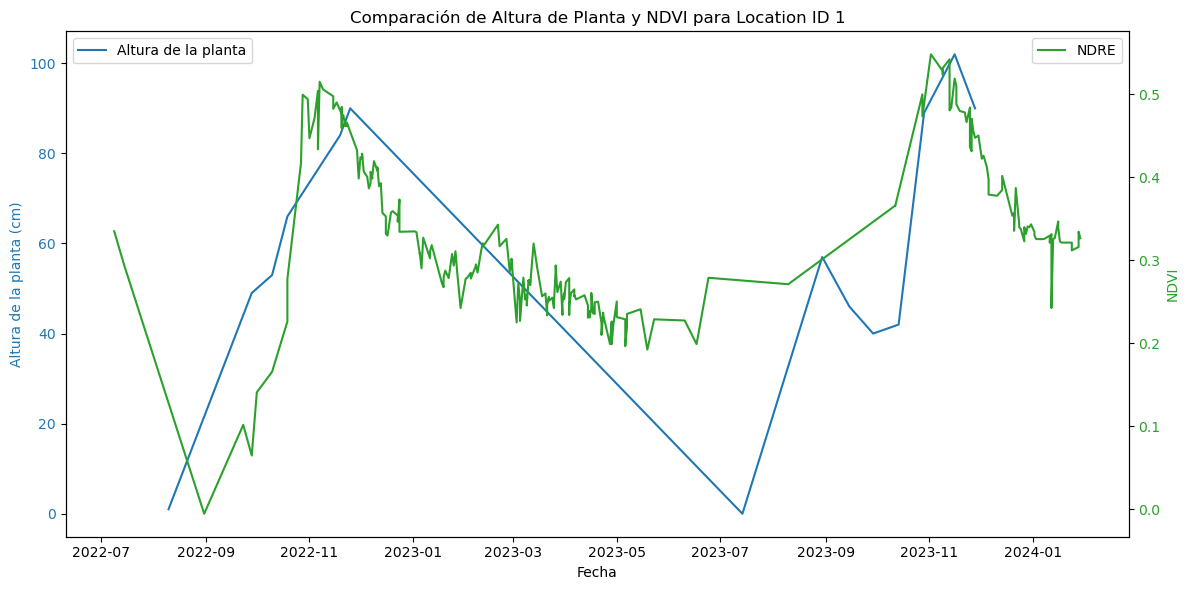

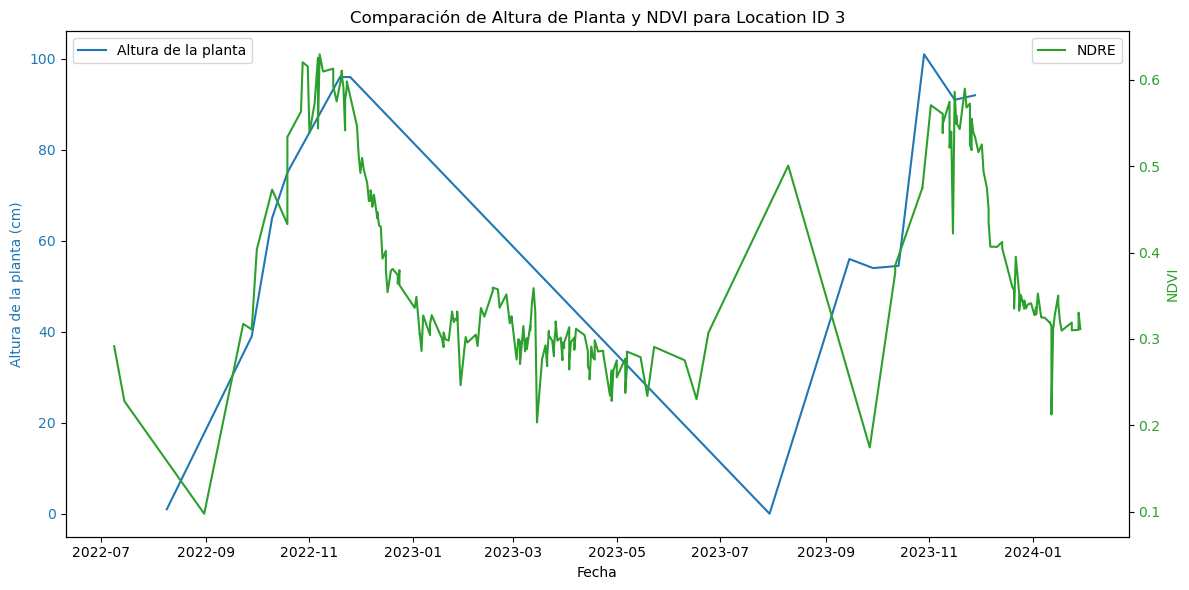

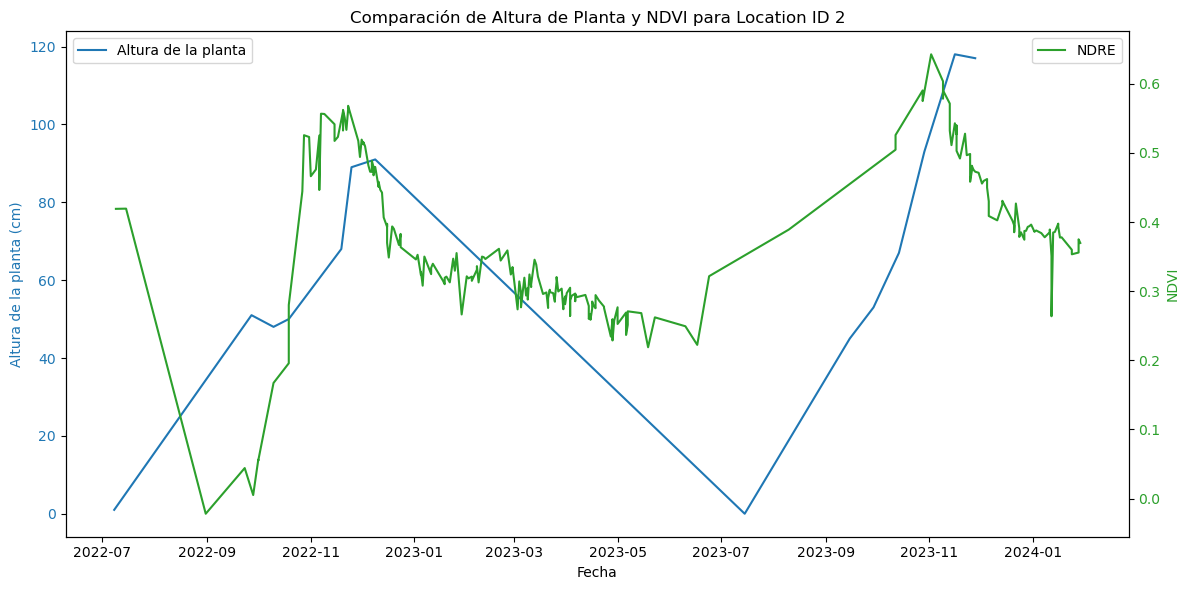

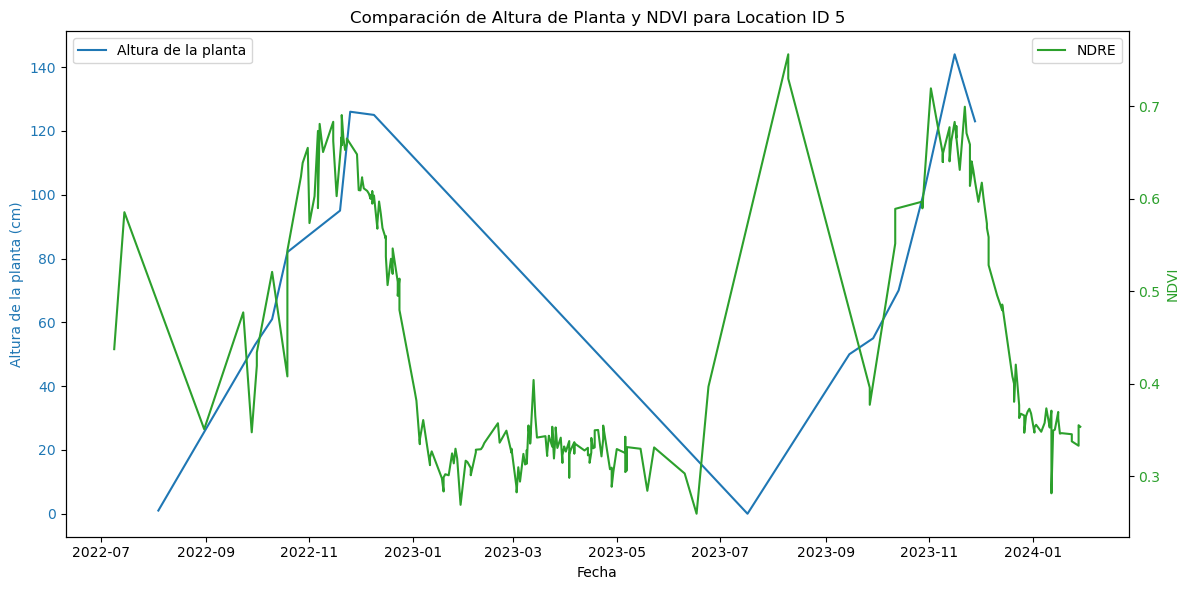

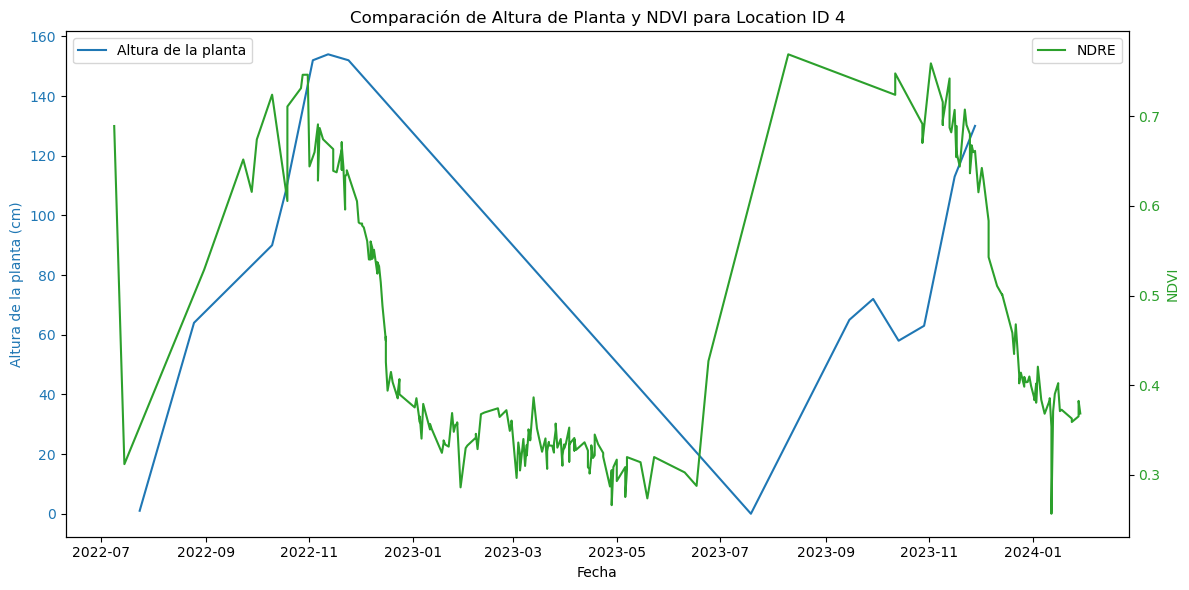

In [26]:

# Convertir las fechas en ambos datasets al formato de fecha
planet_data['image_date'] = pd.to_datetime(planet_data['image_date'])
crop_data['fecha_medicion'] = pd.to_datetime(crop_data['fecha_medicion'])

# Obtener la lista de location_id únicos
location_ids = crop_data['location_id'].unique()

# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    planet_data_loc = planet_data.copy()
    planet_data_loc = planet_data_loc[planet_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Altura de la planta (cm)', color='tab:blue')
    ax1.plot(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Altura de la planta')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDVI', color='tab:green')
    ax2.plot(planet_data_loc['image_date'], planet_data_loc['NDVI'], color='tab:green', label='NDRE')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Comparación de Altura de Planta y NDVI para Location ID {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()


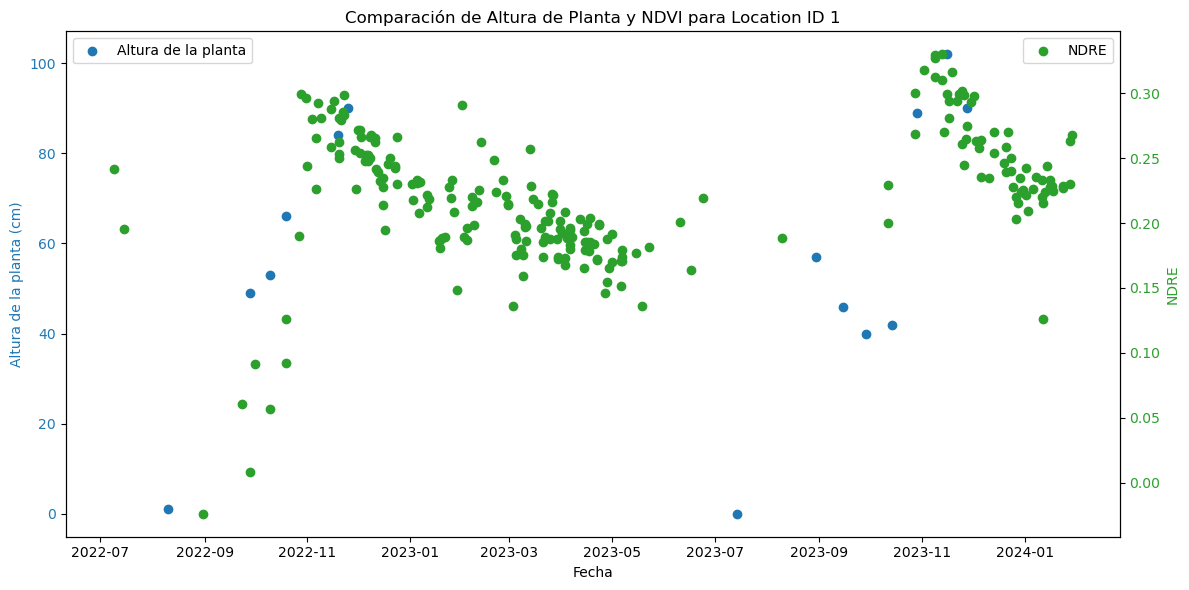

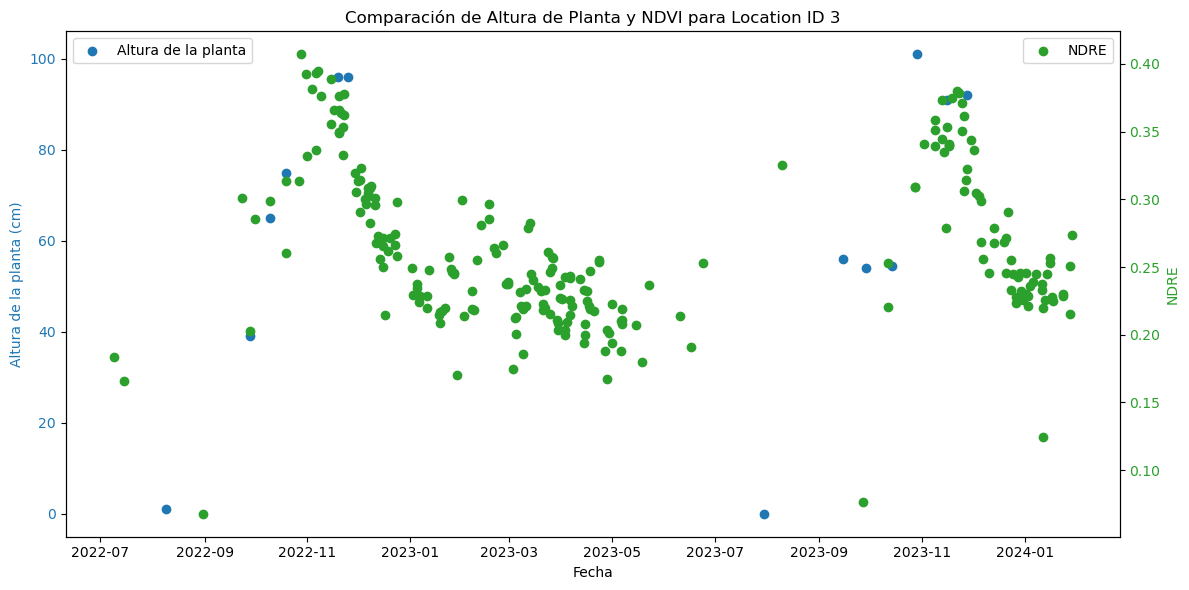

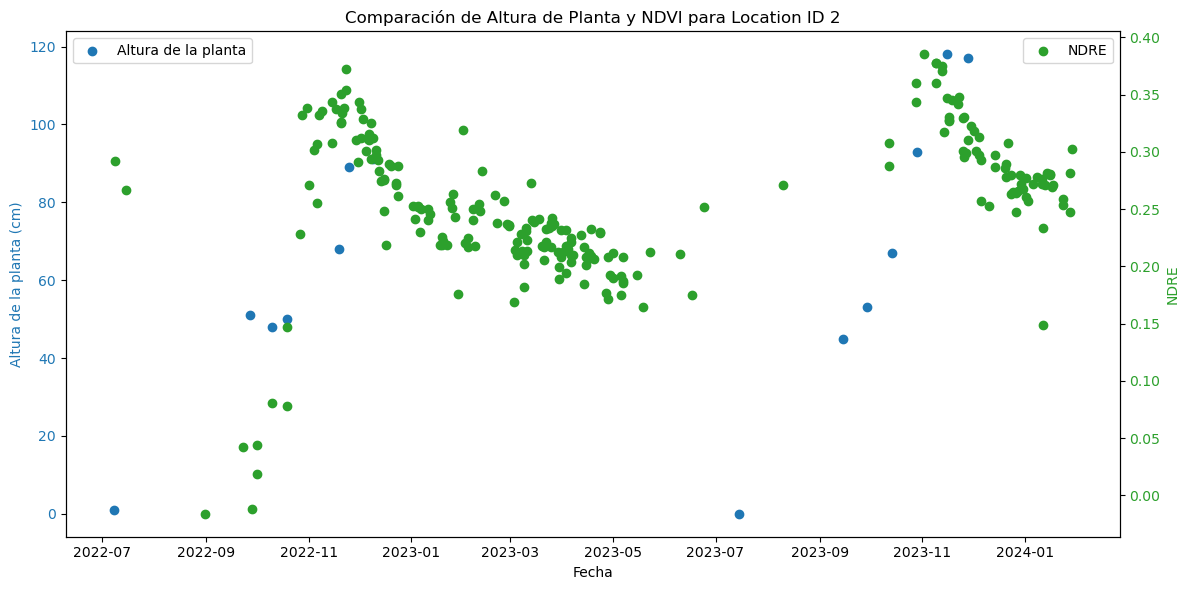

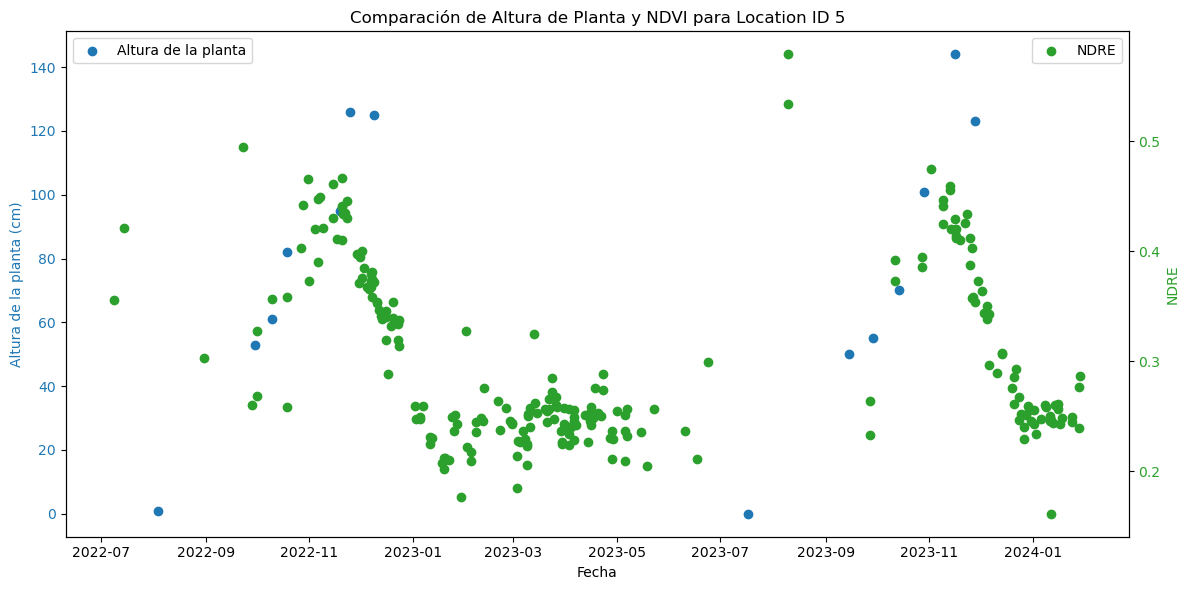

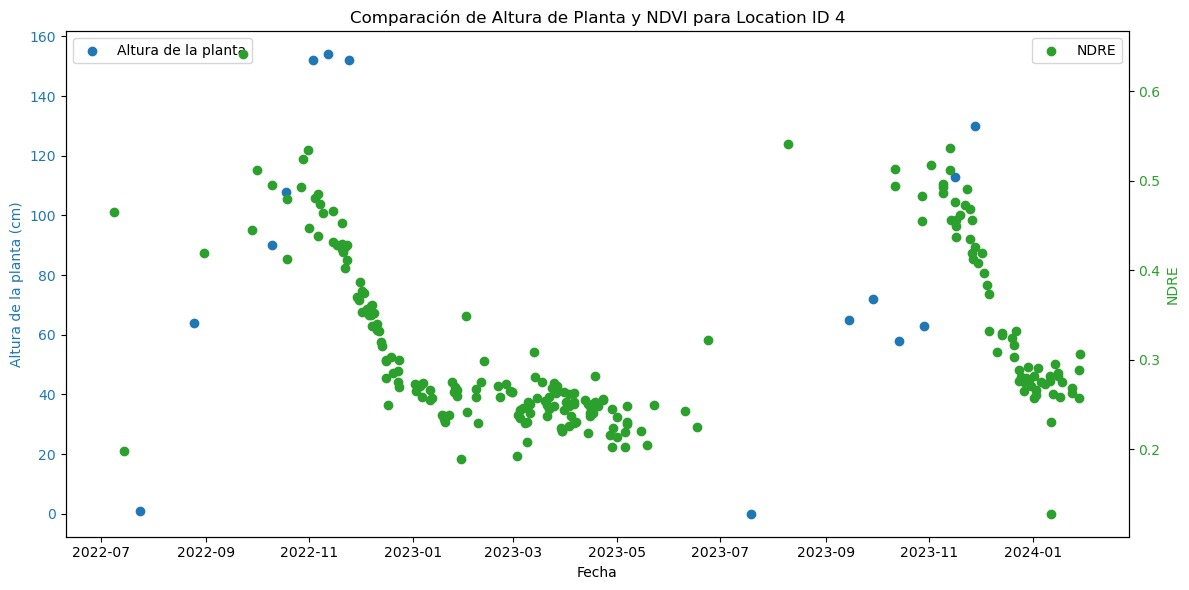

In [27]:
# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    planet_data_loc = planet_data.copy()
    planet_data_loc = planet_data_loc[planet_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Altura de la planta (cm)', color='tab:blue')
    ax1.scatter(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Altura de la planta')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: NDVI
    ax2 = ax1.twinx()
    ax2.set_ylabel('NDRE', color='tab:green')
    ax2.scatter(planet_data_loc['image_date'], planet_data_loc['NDRE'], color='tab:green', label='NDRE')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Comparación de Altura de Planta y NDVI para Location ID {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()

### Crecimiento vs indices SAR

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
SAR_data = pd.read_excel('../DataIn/Analisis_basico_crecimiento/Sentinel_1_data.xlsx', sheet_name = 'Sheet2')

In [28]:
SAR_data.head()

,location_id,polygon_id,Stokes2_DoLP,Stokes2_LPR,Stokes2_Phi,Stokes2_Tau,Stokes2_g0,Stokes2_g1,Stokes2_g2,Stokes2_g3,...,Stokes2_l2,alpha,area_ha,area_m2,entropy,entropy_shannon,entropy_shannon_norm,image_date,span,geometry
0,1,3,0.571070,0.278899,-2.987174,2.377644,0.087572,0.049622,-0.005814,0.003623,...,0.018504,22.286879,0.0417,417.453,0.745245,-2.379428,0.574763,2022-07-04,0.075529,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
1,1,3,0.695337,0.181027,-2.029710,-2.246712,0.143738,0.099701,-0.007047,-0.007791,...,0.021726,15.717934,0.0417,417.453,0.612639,-1.646521,0.677675,2022-07-16,0.153608,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
2,1,3,0.755319,0.143670,-3.612245,0.086670,0.122078,0.091424,-0.011658,0.000278,...,0.014922,13.770551,0.0417,417.453,0.535649,-2.149926,0.571785,2022-07-28,0.126392,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
3,1,3,0.684568,0.188089,0.837804,-2.817688,0.156095,0.107194,0.002817,-0.010857,...,0.024120,16.142057,0.0417,417.453,0.622882,-1.467737,0.719372,2022-08-09,0.206184,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."
4,1,3,0.657874,0.207113,-0.408160,-4.948636,0.107767,0.070913,-0.001161,-0.012370,...,0.017844,18.389165,0.0417,417.453,0.648314,-2.148673,0.621456,2022-08-21,0.095385,"{'type': 'Polygon', 'coordinates': [[[-16.4435..."


In [29]:
crop_data.head()

,crop_register_id,location_id,site_id,farmer_id,type_variety_id,variety_id,fecha_medicion,dias_despues_siembra,n_plantas,peso_fresco,peso_fresco_planta,peso_seco,peso_seco_planta,long_raiz,altura_planta,leaf_area_index
0,1,1,1,1,1,1,2022-08-10,1,1.0,0.10,0.100000,0.10,0.100000,1.0,1.0,0.00
1,2,1,1,1,1,1,2022-09-28,48,5.0,9.36,1.872000,1.65,0.330000,17.0,49.0,0.14
2,3,1,1,1,1,1,2022-10-10,60,5.0,32.10,6.420000,3.97,0.794000,19.0,53.0,0.35
3,4,1,1,1,1,1,2022-10-19,69,5.0,70.19,14.038000,8.46,1.692000,30.0,66.0,0.71
4,5,1,1,1,1,1,2022-11-19,99,9.0,155.82,17.313333,37.18,4.131111,27.0,84.0,0.60


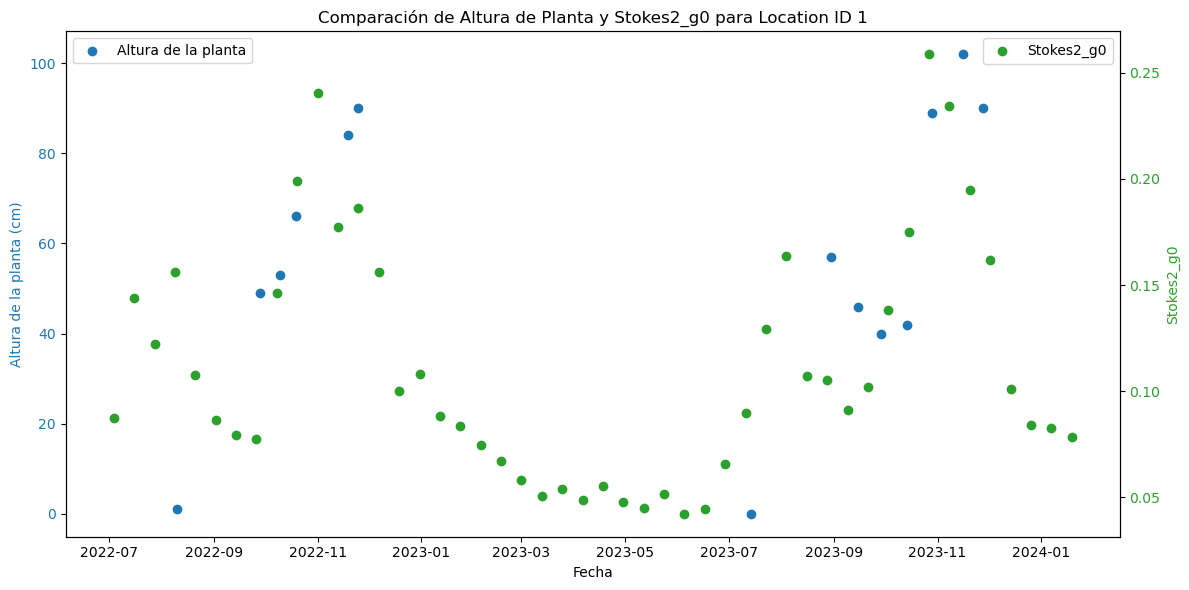

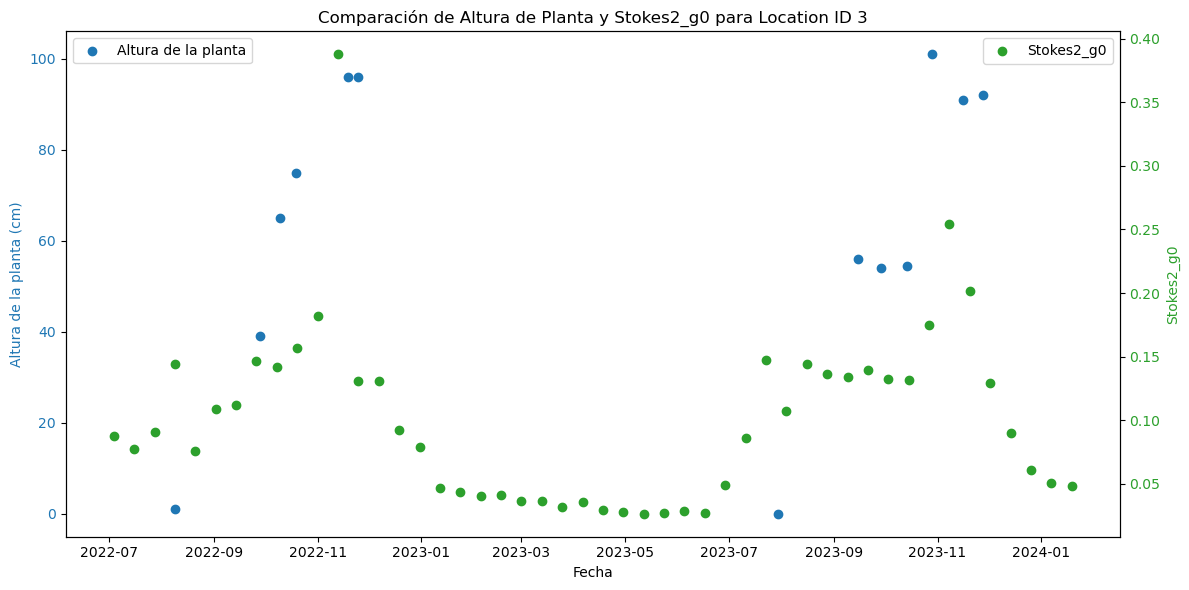

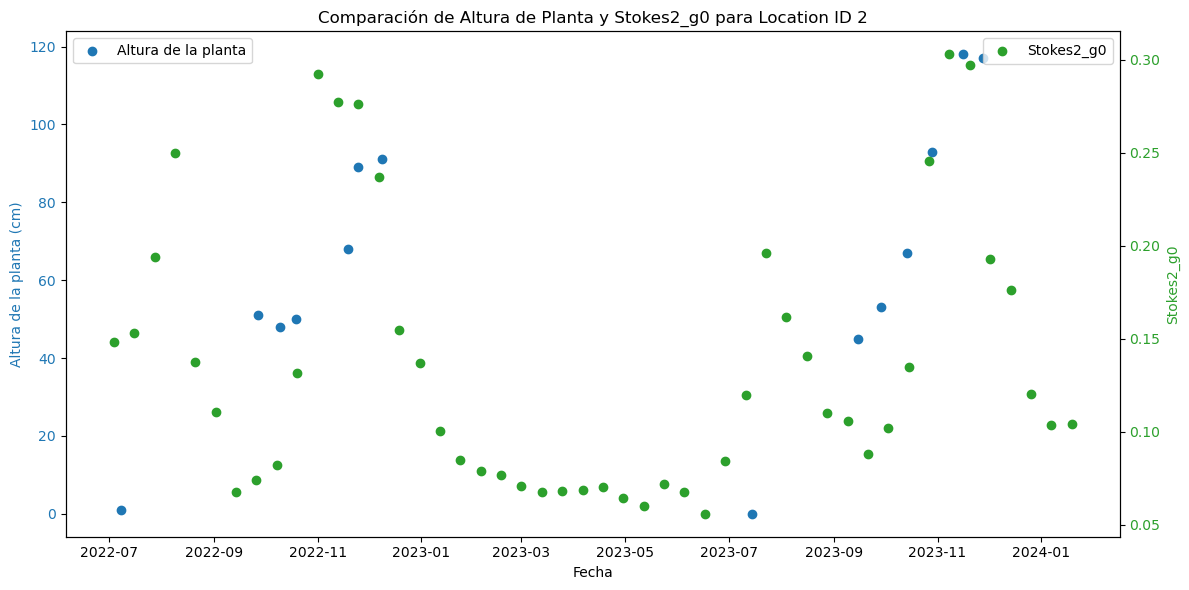

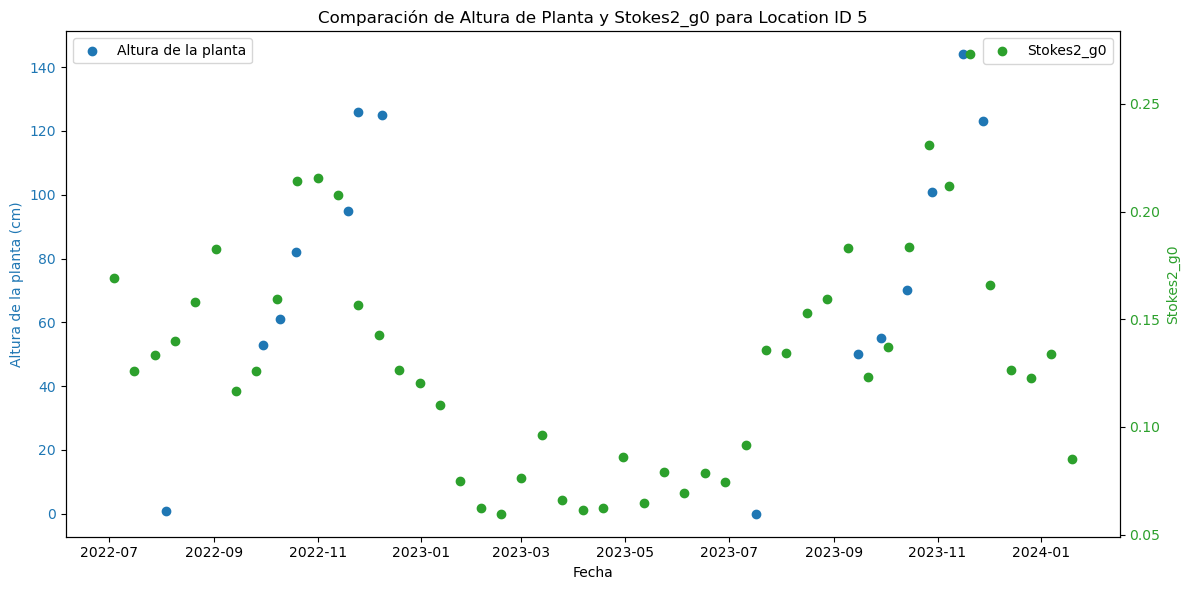

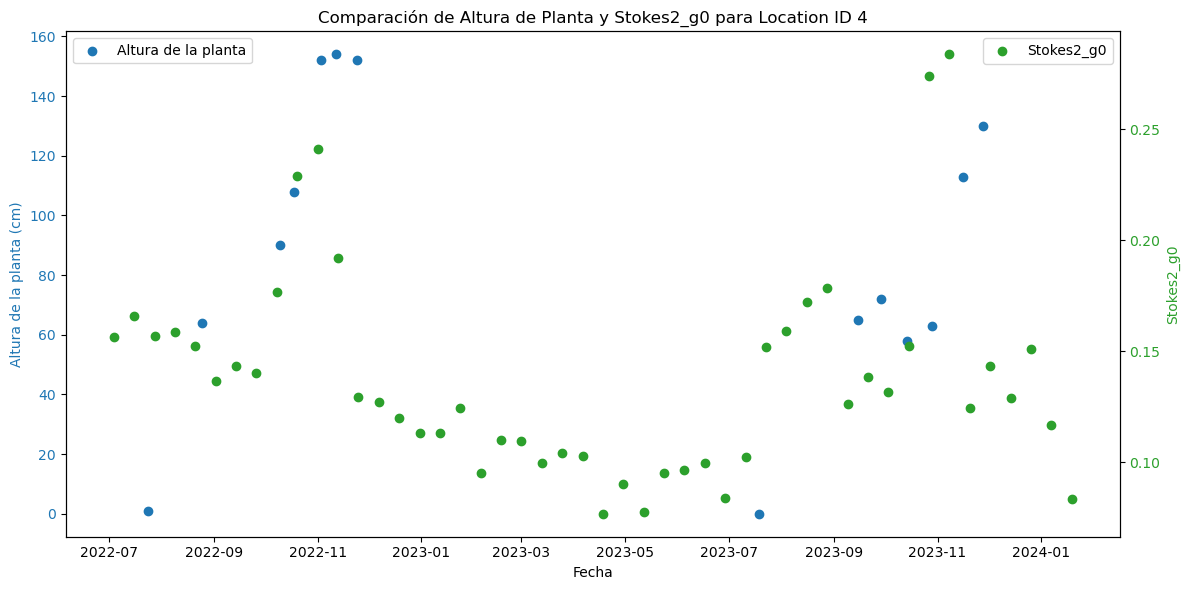

In [31]:
# Crear gráficos por separado para cada location_id
for loc_id in location_ids:
    # Filtrar los datos por location_id
    crop_data_loc = crop_data[crop_data['location_id'] == loc_id]
    SAR_data_loc = SAR_data.copy()
    SAR_data_loc = SAR_data_loc[SAR_data_loc['location_id']== loc_id]

    # Crear la figura y los ejes
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Eje Y izquierdo: altura de la planta
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Altura de la planta (cm)', color='tab:blue')
    ax1.scatter(crop_data_loc['fecha_medicion'], crop_data_loc['altura_planta'], color='tab:blue', label='Altura de la planta')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # Eje Y derecho: 
    ax2 = ax1.twinx()
    ax2.set_ylabel('Stokes2_g0', color='tab:green')
    ax2.scatter(SAR_data_loc['image_date'], SAR_data_loc['Stokes2_g0'], color='tab:green', label='Stokes2_g0')
    ax2.tick_params(axis='y', labelcolor='tab:green')
    ax1.legend(loc='upper left')  # Leyenda para el eje izquierdo
    ax2.legend(loc='upper right')

    # Añadir títulos y leyendas
    plt.title(f'Comparación de Altura de Planta y Stokes2_g0 para Location ID {loc_id}')
    fig.tight_layout()

    # Mostrar la figura
    plt.show()